In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_thc_lsa.csv")

In [3]:
df_mlp

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,anxious,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Delta9-THC
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.259712
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.259712
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.259712
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.259712
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.259712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562557


In [4]:
df_mlp.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'woody',
 'X..D

In [5]:
X = df_mlp.drop(['X..Delta9-THC'], axis = 1)
y = df_mlp[['X..Delta9-THC']]

<AxesSubplot:ylabel='Count'>

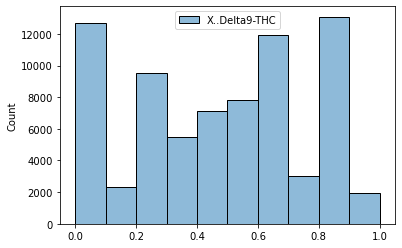

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.15526080201271275

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.5844161565199828

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.4604052178585222

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.27780618e-01, 1.21647351e-01, 1.27653254e-01, 1.19058813e-01,
       1.22422613e-01, 1.17125640e-02, 1.09122152e-02, 2.78361075e-02,
       1.30166923e-04, 2.14611135e-03, 8.70394248e-03, 3.96936941e-06,
       7.93190494e-03, 1.03871987e-04, 3.99865129e-03, 6.53130129e-03,
       8.78205135e-03, 7.63565596e-03, 2.91335241e-06, 1.00187696e-02,
       3.51619037e-06, 3.97965093e-06, 7.71750546e-03, 6.73301517e-03,
       1.02853392e-02, 2.54721038e-03, 9.64462769e-03, 9.83410599e-05,
       2.40165948e-06, 2.12126113e-03, 1.23197289e-02, 5.37144022e-06,
       1.12621073e-02, 0.00000000e+00, 8.08670782e-08, 5.66811698e-03,
       6.38833798e-03, 9.11309743e-03, 1.59920038e-03, 3.20553108e-04,
       7.23518136e-04, 5.38677106e-03, 1.55460787e-04, 5.07636863e-03,
       1.27615877e-03, 1.03977068e-02, 1.54212563e-03, 2.83701343e-04,
       6.21517838e-03, 1.24007622e-03, 2.78301164e-02, 1.24541056e-02,
       3.04673996e-03, 1.22223961e-03, 7.59664464e-03, 1.55363243e-03,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,relaxed,diesel,earthy,lemon,orange,sweet
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,1,0,0,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,0,0,1
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,1,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'relaxed',
 'diesel',
 'earthy',
 'lemon',
 'orange',
 'sweet']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_thc.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_thc.pkl")

['selected_X_mlp_lsa_elbow_thc.pkl']

In [14]:
import joblib

selected_X = joblib.load("selected_X_mlp_lsa_elbow_thc.pkl")

Train test split (after Feature Selection)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [17]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.20878224386710084

In [19]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.2449061990660909

In [20]:
#val
r2_score(y_val, y_pred_mlpreg)

0.226082011254658

Hyperparameter Tuning

In [21]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [22]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [23]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [24]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh'}

In [25]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_thc.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_thc.pkl")

['rscv_mlp_lsa_elbow_best_params_thc.pkl']

MLP fit (after hyperparameter tuning)

In [26]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'tanh', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.15754926305232955

In [28]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.5743225906417272

In [29]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.46756888497949334

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [30]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [31]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_thc.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_thc.pkl")

['y_test_mlpreg_lsa_elbow_thc.pkl']

In [32]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.15661278273463217

In [33]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.04250522956766585

In [34]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.20616796445535823

In [35]:
r2_score(y_test, y_pred_mlpreg_test)

0.483471346784493

Error analysis

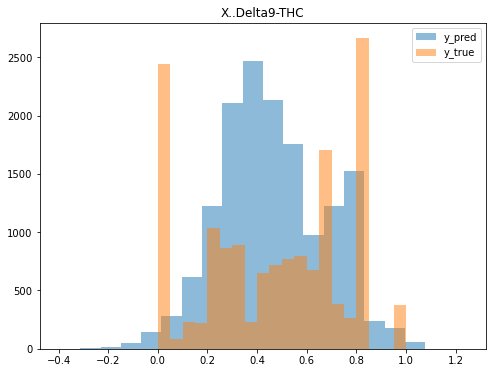

<Figure size 432x288 with 0 Axes>

In [36]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Delta9-THC"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_thc.png')

Pearson R

In [37]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.697
P-value: 0.000


<AxesSubplot:>

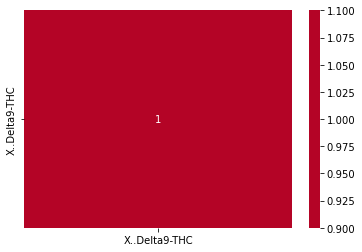

In [38]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)